In [1]:
# install required packages
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install numpy 


  Using cached python_dateutil-2.8.1-py2.py3-none-any.whl (227 kB)
  Using cached pytz-2020.1-py2.py3-none-any.whl (510 kB)
  Using cached numpy-1.19.2-cp37-cp37m-win_amd64.whl (12.9 MB)
  Using cached six-1.15.0-py2.py3-none-any.whl (10 kB)
  Using cached kiwisolver-1.2.0-cp37-none-win_amd64.whl (57 kB)
  Using cached pyparsing-2.4.7-py2.py3-none-any.whl (67 kB)
  Using cached certifi-2020.6.20-py2.py3-none-any.whl (156 kB)
  Using cached cycler-0.10.0-py2.py3-none-any.whl (6.5 kB)
  Using cached seaborn-0.11.0-py3-none-any.whl (283 kB)


In [2]:
# import functions
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib notebook
plt.rcParams['figure.figsize'] = [20, 20]

from helpers import load_csv

In [3]:
# load data in numpy structured array
data = load_csv("dataset/train.csv")

In [5]:
# convert to pandas dataframe for vis
df = pd.DataFrame(data).set_index('Id')

In [7]:
# show df
df.head()

,Prediction,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,...,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt
Id,,,,,,,,,,,,,,,,,,,,,
100000,1,138.470,51.655,97.827,27.980,0.91,124.711,2.666,3.064,41.928,...,-0.277,258.733,2,67.435,2.150,0.444,46.062,1.24,-2.475,113.497
100001,0,160.937,68.768,103.235,48.146,-999.00,-999.000,-999.000,3.473,2.078,...,-1.916,164.546,1,46.226,0.725,1.158,-999.000,-999.00,-999.000,46.226
100002,0,-999.000,162.172,125.953,35.635,-999.00,-999.000,-999.000,3.148,9.336,...,-2.186,260.414,1,44.251,2.053,-2.028,-999.000,-999.00,-999.000,44.251
100003,0,143.905,81.417,80.943,0.414,-999.00,-999.000,-999.000,3.310,0.414,...,0.060,86.062,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000
100004,0,175.864,16.915,134.805,16.405,-999.00,-999.000,-999.000,3.891,16.405,...,-0.871,53.131,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 250000 entries, 100000 to 349999
Data columns (total 31 columns):
Prediction                     250000 non-null int32
DER_mass_MMC                   250000 non-null float64
DER_mass_transverse_met_lep    250000 non-null float64
DER_mass_vis                   250000 non-null float64
DER_pt_h                       250000 non-null float64
DER_deltaeta_jet_jet           250000 non-null float64
DER_mass_jet_jet               250000 non-null float64
DER_prodeta_jet_jet            250000 non-null float64
DER_deltar_tau_lep             250000 non-null float64
DER_pt_tot                     250000 non-null float64
DER_sum_pt                     250000 non-null float64
DER_pt_ratio_lep_tau           250000 non-null float64
DER_met_phi_centrality         250000 non-null float64
DER_lep_eta_centrality         250000 non-null float64
PRI_tau_pt                     250000 non-null float64
PRI_tau_eta                    250000 non-null float64
PRI_ta

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020993B8E188>,
      dtype=object)

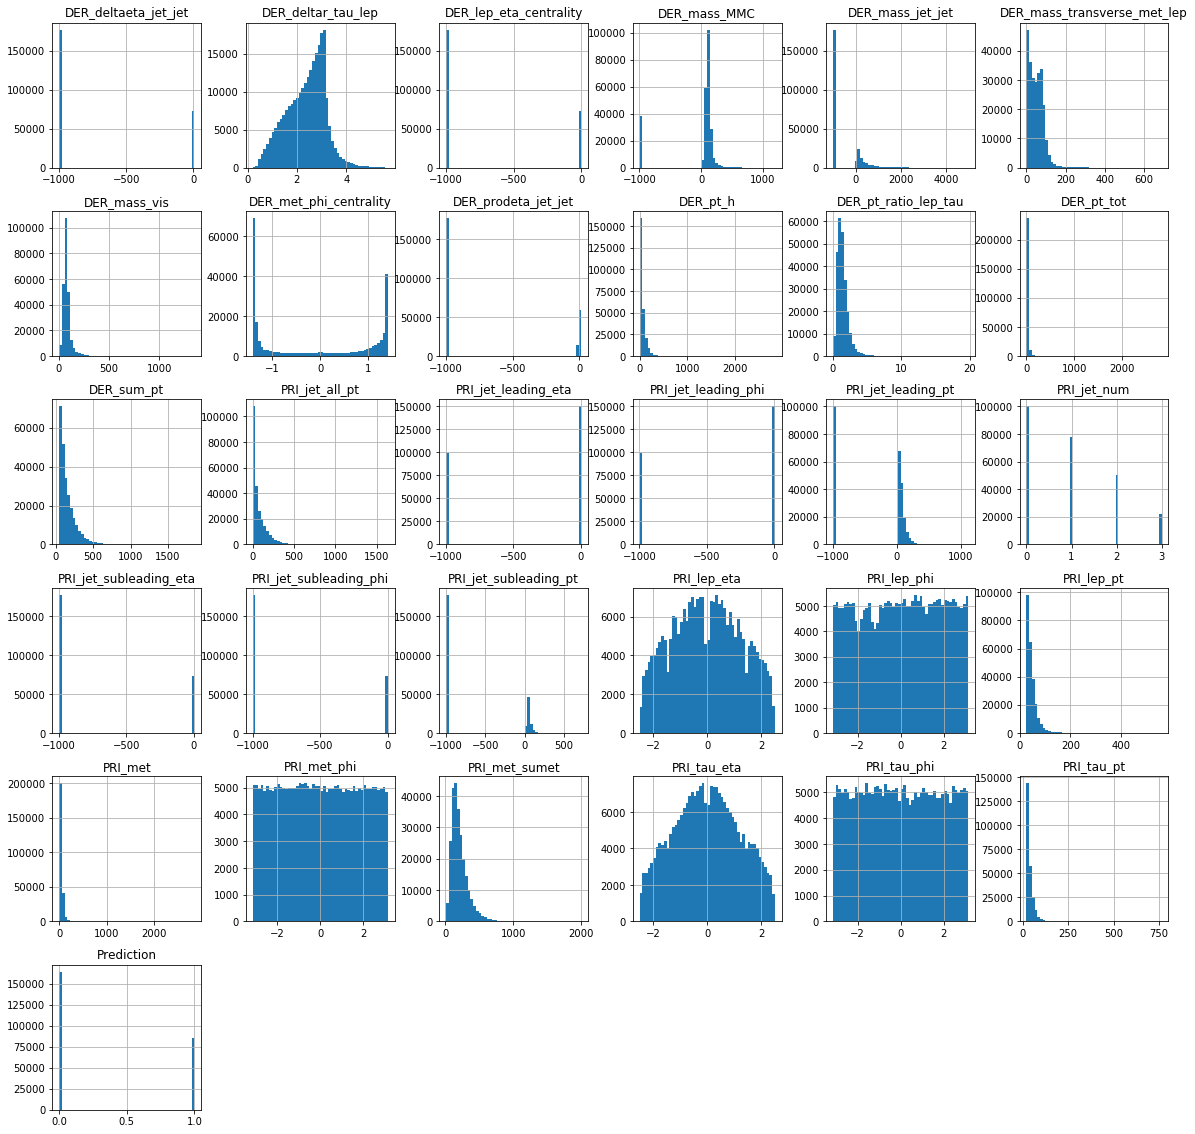

In [11]:
df.hist(bins=50, figsize=(20,20))
#note how the -999.0 values correspond to "null"
# some features are quite useless on first sight
#also lots of fat-tail distributions 

In [35]:
df['Prediction'].value_counts()

0    164333
1     85667
Name: Prediction, dtype: int64

## Boxplot of all features

<IPython.core.display.Javascript object>


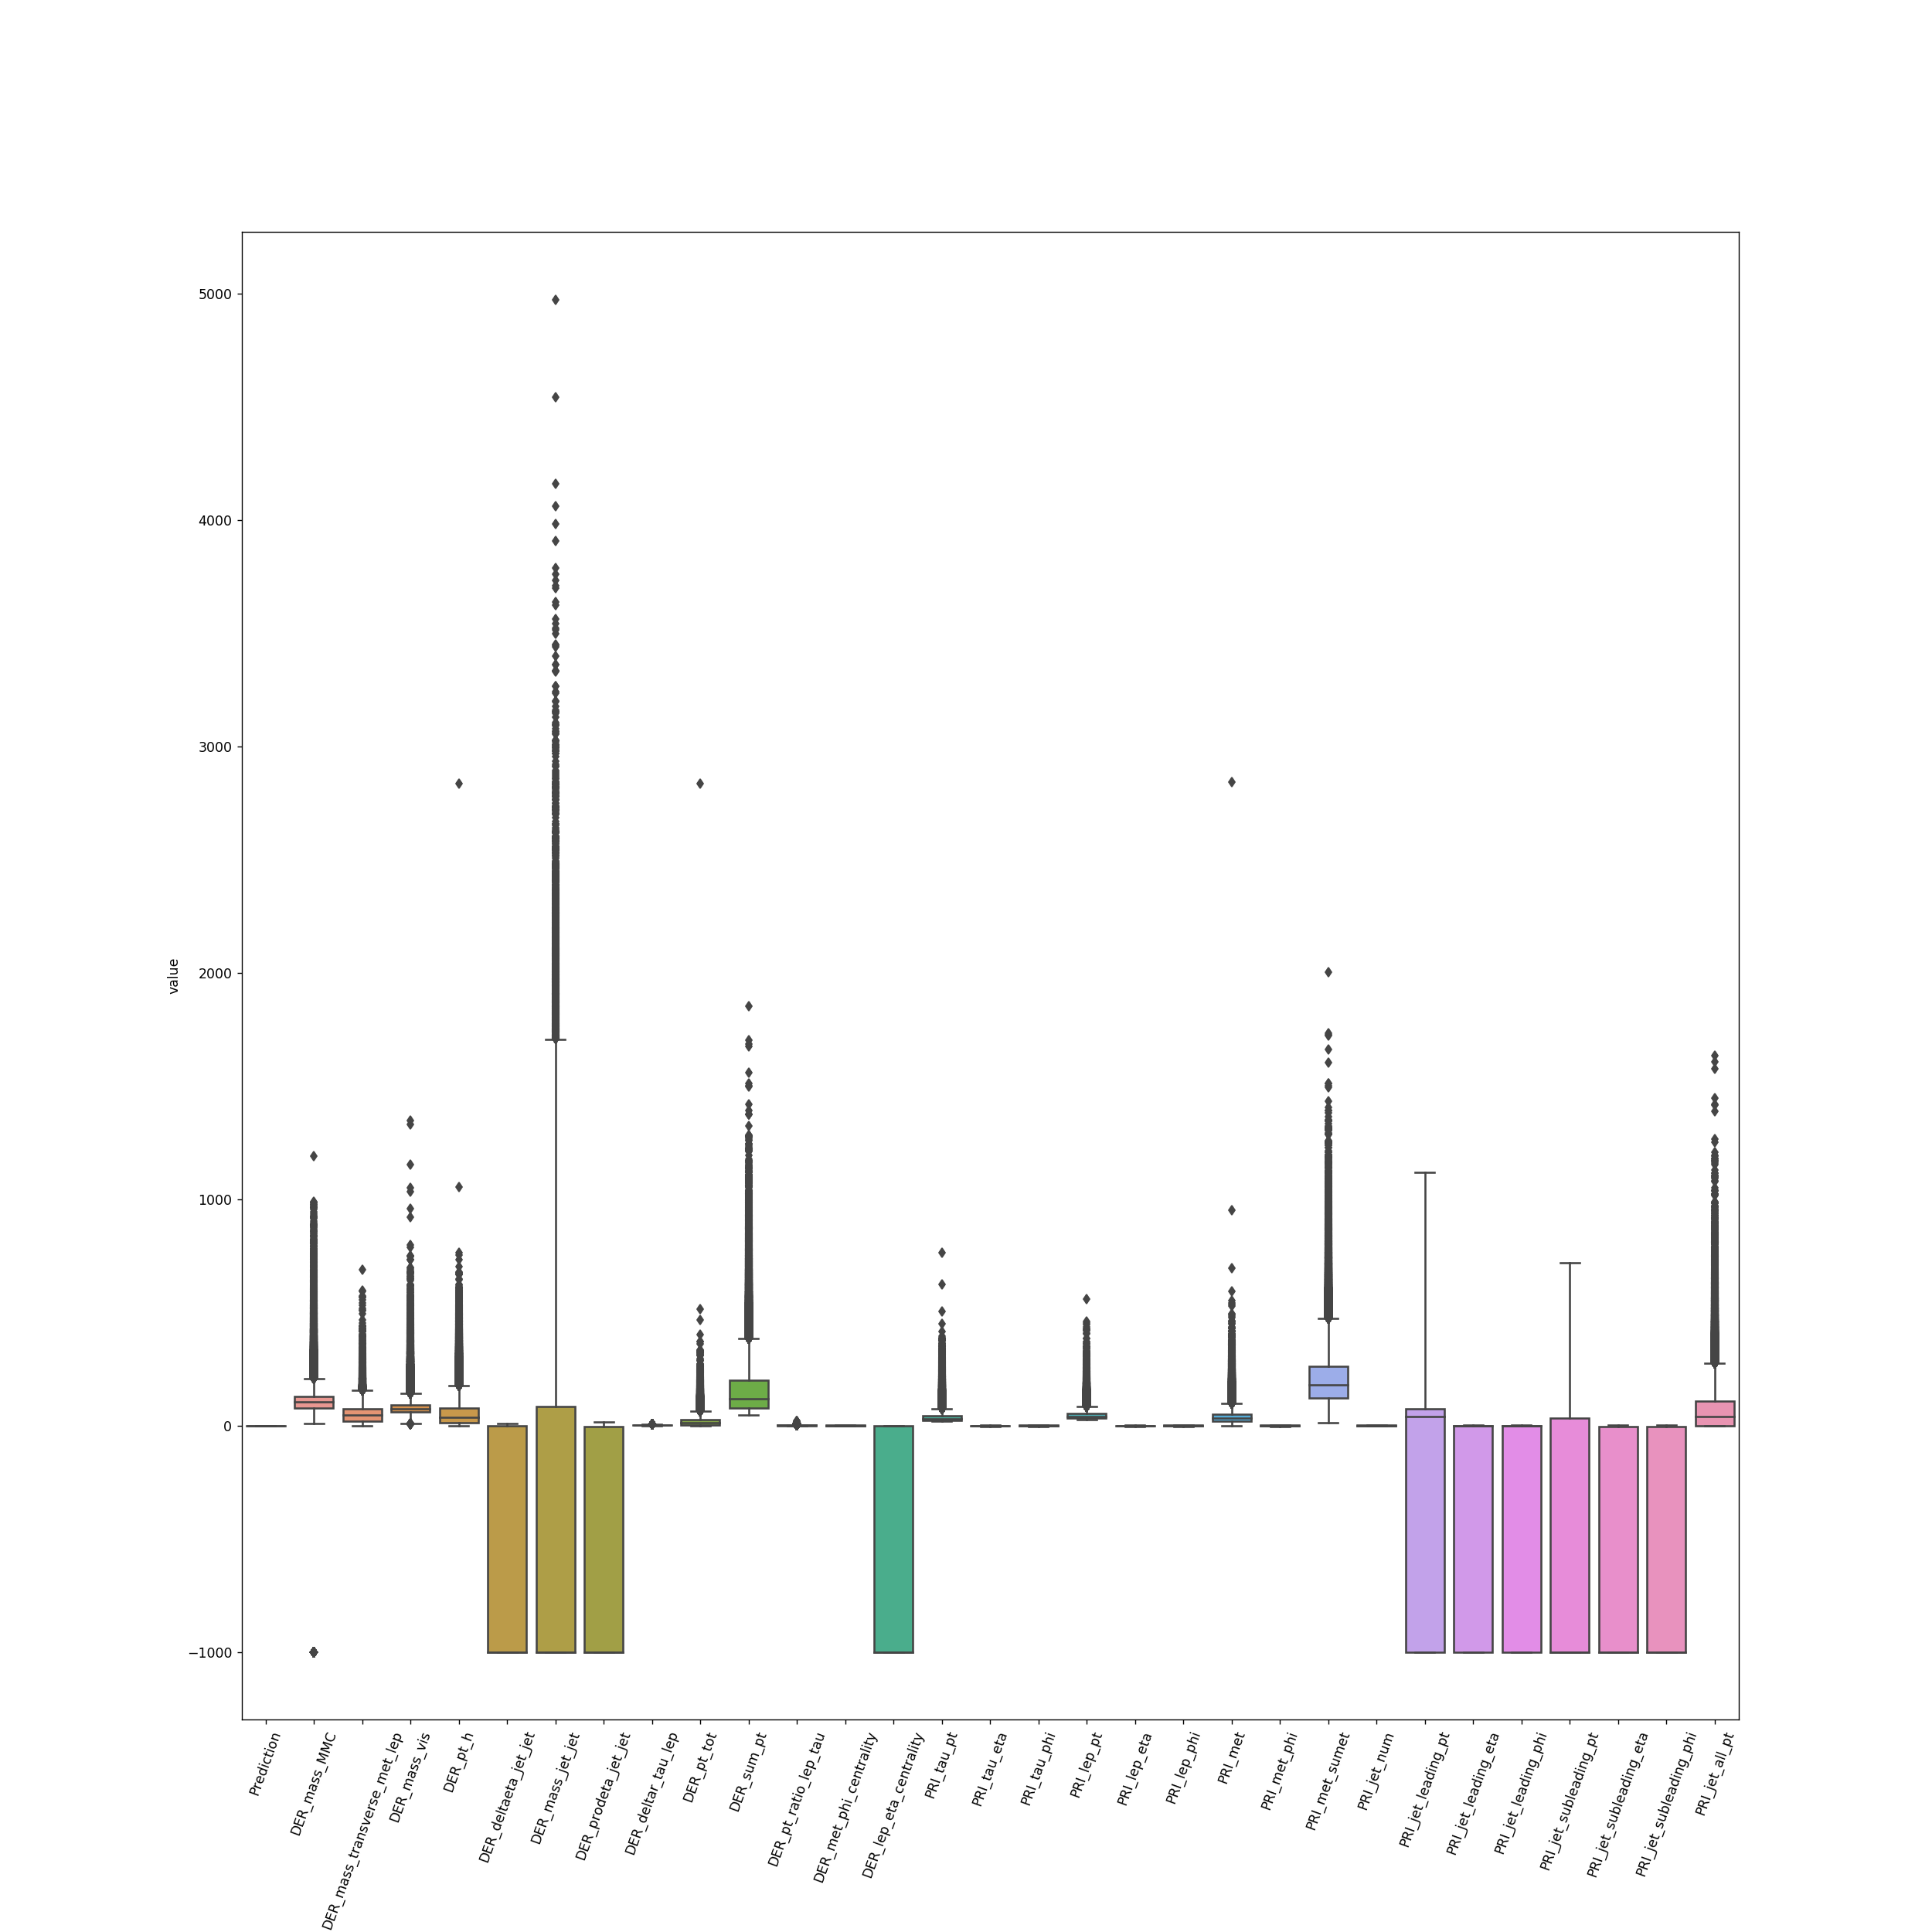

In [24]:
g = sns.boxplot(x="variable", y="value", data=pd.melt(df))
g.set_xticklabels(g.get_xticklabels(),rotation=70)

plt.show()
#plt.savefig("EDA/boxplot.png")

## Histograms by prediction value

<IPython.core.display.Javascript object>


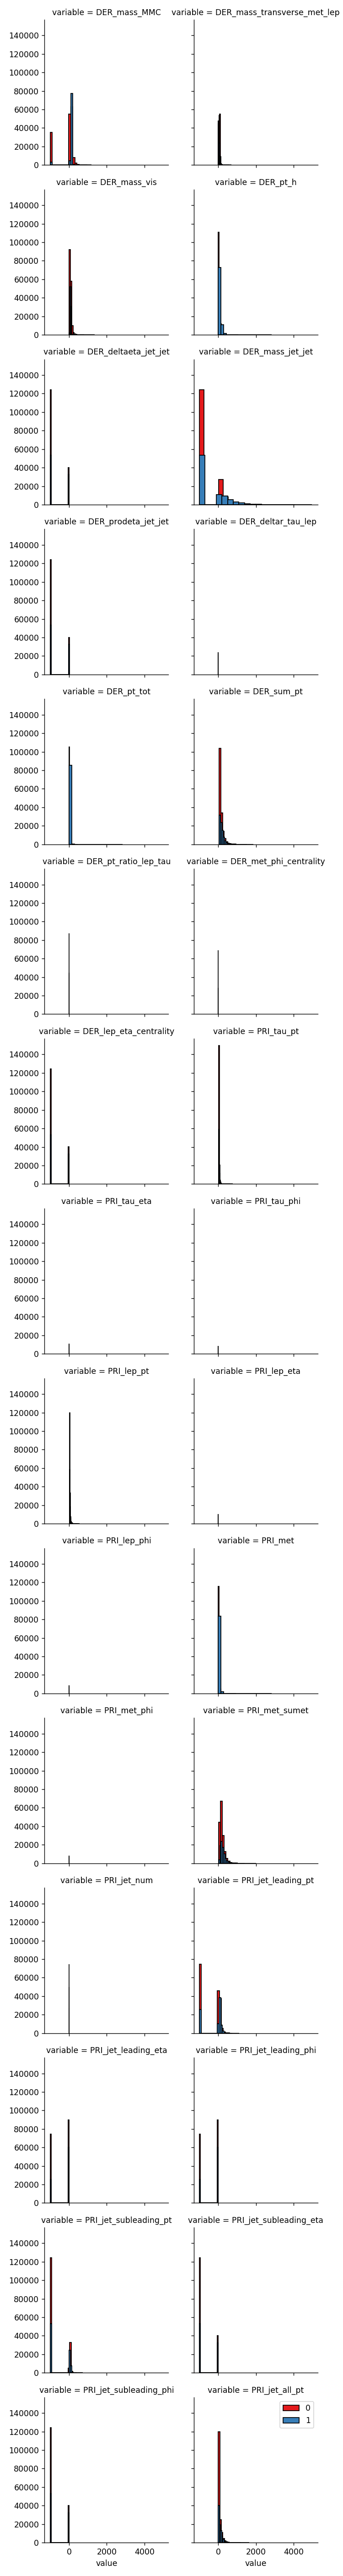

In [43]:
df2 = pd.melt(df, id_vars='Prediction')

bins=np.linspace(df2.value.min(), df2.value.max(), 100)
g = sns.FacetGrid(df2, col="variable", hue="Prediction", palette="Set1", col_wrap=2)
g.map(plt.hist, 'value', bins=20, ec="k")

g.axes[-1].legend()
plt.show()

## Correlation Heatmap

<IPython.core.display.Javascript object>


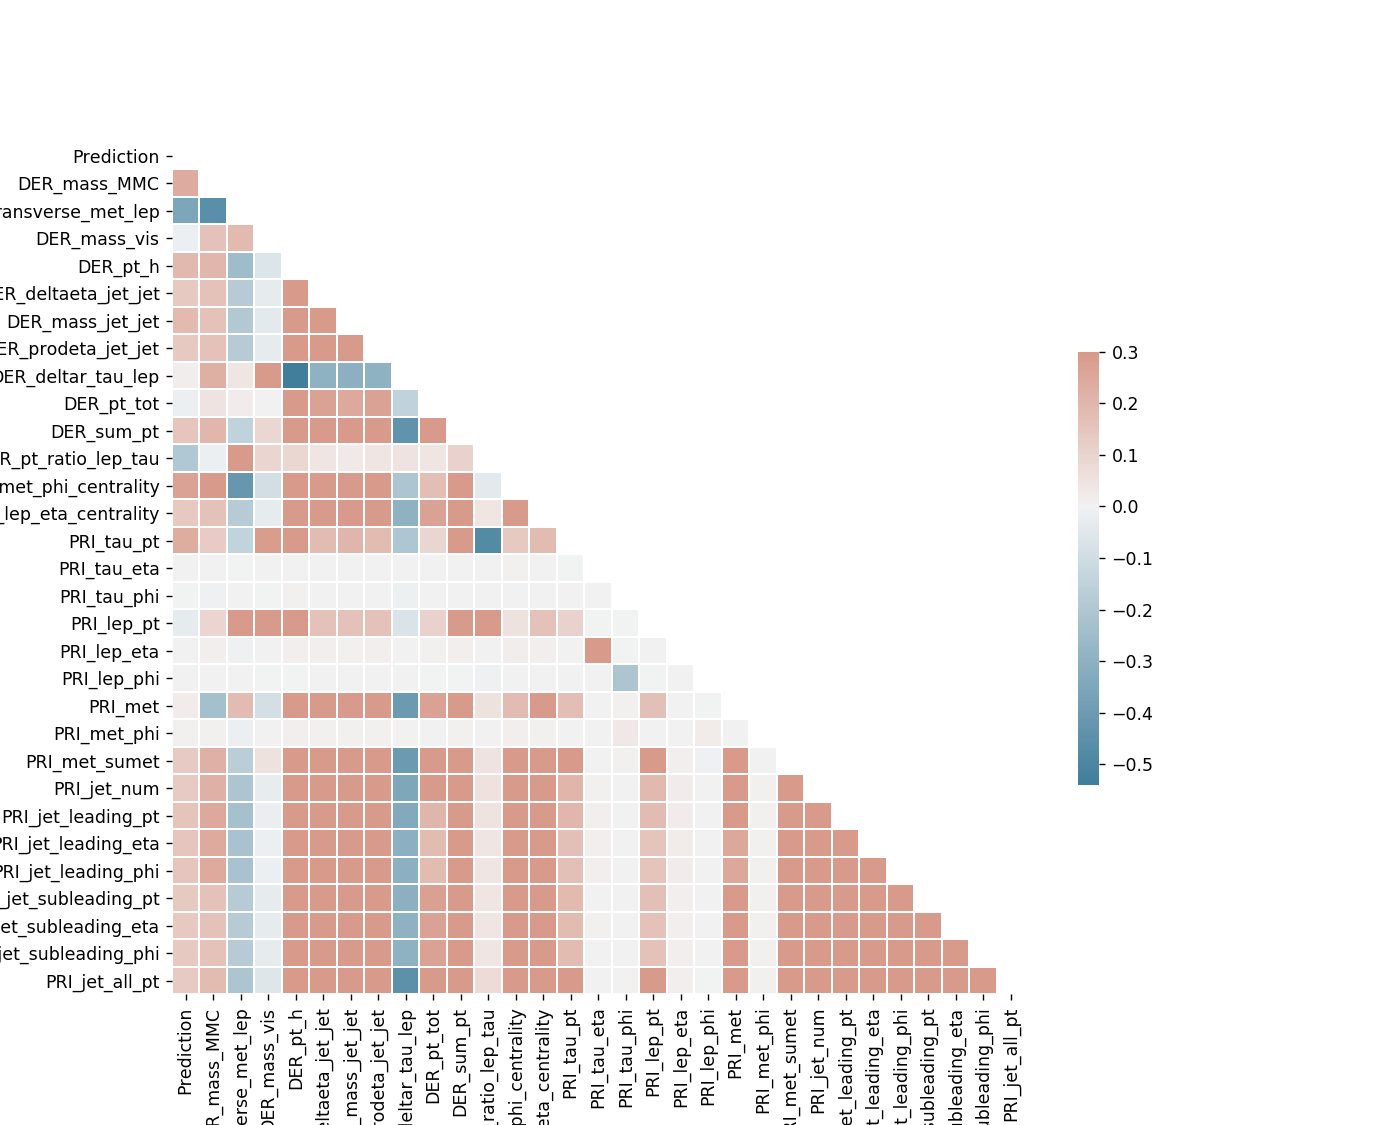

In [27]:

corr = df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
#plt.savefig("EDA/heatmap.png")